# Radius of gyration as an indicator of protein structure compactness

In [48]:
%matplotlib inline

import numpy as np
import pandas as pd
import sys, getopt

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

import seaborn as sns
#sns.set_color_codes("pastel")
#sns.set(style="darkgrid")
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("darkgrid")

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

In [49]:
dfu=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_unmod/Analyses/Rad/rad1.out", header=0, delim_whitespace=True).reset_index()
dfua=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_unmod_ack4/Analyses/Rad/rad1.out", header=0, delim_whitespace=True).reset_index()

dft=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_trans63/Analyses/Rad/rad1.out", header=0, delim_whitespace=True).reset_index()
dfta=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_trans63_ack4/Analyses/Rad/rad1.out", header=0, delim_whitespace=True).reset_index()

dfc=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_cis63/Analyses/Rad/rad1.out", header=0, delim_whitespace=True).reset_index()
dfca=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_cis63_ack4/Analyses/Rad/rad1.out", header=0, delim_whitespace=True).reset_index()

In [50]:
print(dfu.shape)
print(dfua.shape)

print(dft.shape)
print(dfta.shape)

print(dfc.shape)
print(dfca.shape)

(7000, 4)
(7000, 4)
(7000, 4)
(7000, 4)
(7000, 4)
(7000, 4)


In [51]:
dfu[:5]

,index,#Frame,RoG_00000,RoG_00000[Max]
0,0,1,12.7278,19.4058
1,1,2,12.7570,18.8947
2,2,3,12.9360,19.5636
3,3,4,13.1579,20.2990
4,4,5,13.0933,19.8321


In [62]:
dfu.columns=['index','num','lesion-free','b']
xu =dfu['lesion-free']
zu =dfu['index']

dfua.columns=['index','num','lesion-free_ack','b']
xua =dfua['lesion-free_ack']
zua =dfua['index']  

In [63]:
dft.columns=['index','num','trans-B[a]P-dG','b']
xt =dft['trans-B[a]P-dG']
zt =dft['index']

dfta.columns=['index','num','trans-B[a]P-dG_ack','b']
xta =dfta['trans-B[a]P-dG_ack']
zta =dfta['index']  

In [64]:
dfc.columns=['index','num','cis-B[a]P-dG','b']
xc =dfc['cis-B[a]P-dG']
zc =dfc['index']

dfca.columns=['index','num','cis-B[a]P-dG_ack','b']
xca =dfca['cis-B[a]P-dG_ack']
zca =dfca['index']  

/home/caiy/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


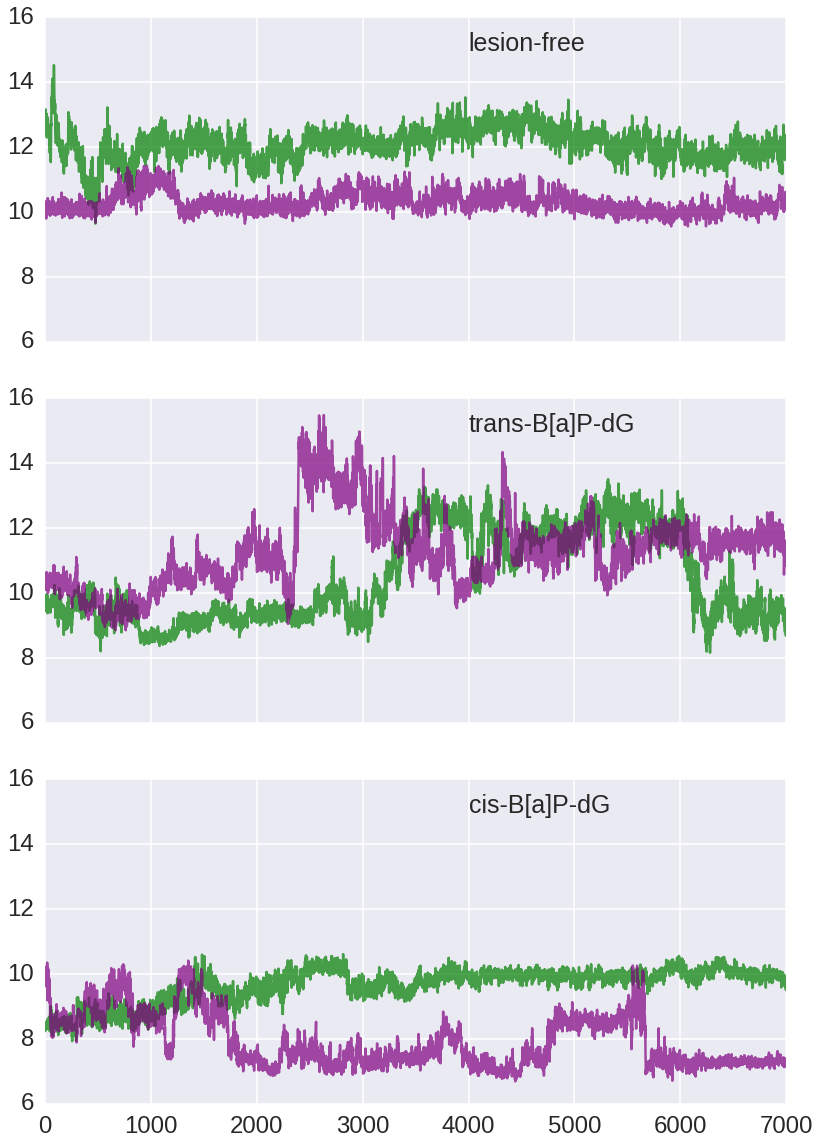

In [65]:
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(12,16),sharex=True, sharey=True)
#sns.despine(left=True)
plt.tight_layout()
fig.subplots_adjust(top=1)
sns.set_style("darkgrid")

ax1.plot(zu,xu,'green',alpha =0.7, label="lesion-free")
ax1.plot(zua,xua,'purple',alpha =0.7,label="lesion-free+ack")
plt.xlim=(0,8000)
plt.ylim=(9,16)

ax2.plot(zt,xt,'green',alpha =0.7,label="trans")
ax2.plot(zta,xta,'purple',alpha =0.7,label="trans+ack")
plt.legend(fontsize=14)
plt.xlim=(0,8000)
plt.ylim=(9,16)

ax3.plot(zc,xc,'green',alpha =0.7,label="cis")
ax3.plot(zca,xca,'purple',alpha =0.7,label="cis+ack")

plt.xlim=(0,8000)
plt.ylim=(9,16)

ax1.text(4000,15, 'lesion-free', fontsize=25)
ax2.text(4000,15, 'trans-B[a]P-dG', fontsize=25)
ax3.text(4000,15, 'cis-B[a]P-dG', fontsize=25)

sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig.savefig('radius_gyration_timedep.png', dpi=600)

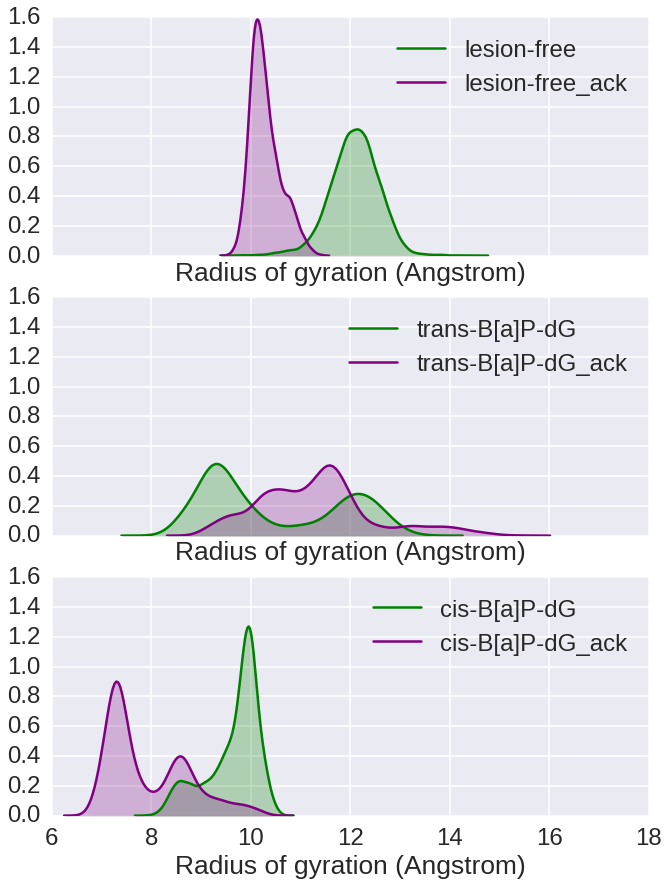

In [72]:
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,16),sharex=True, sharey=True)
#sns.despine(left=True)
plt.tight_layout()

fig.subplots_adjust(top=0.75)
sns.set_style("darkgrid")
#sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.kdeplot(xu, ax=ax1,shade=True, color='green' )
sns.kdeplot(xua, ax=ax1,shade=True,color='purple')

sns.kdeplot(xt, ax=ax2,shade=True,color='green')
sns.kdeplot(xta, ax=ax2,shade=True,color='purple')

sns.kdeplot(xc, ax=ax3,shade=True, color='green')
sns.kdeplot(xca, ax=ax3,shade=True,color='purple')

ax1.set_xlabel('Radius of gyration (Angstrom)')
ax2.set_xlabel('Radius of gyration (Angstrom)')
ax3.set_xlabel('Radius of gyration (Angstrom)')

fig.savefig('radius_gyration_hist.png', dpi=600)